In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC


### Question 2: Logistic Regression


In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['species'] = iris.target

df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


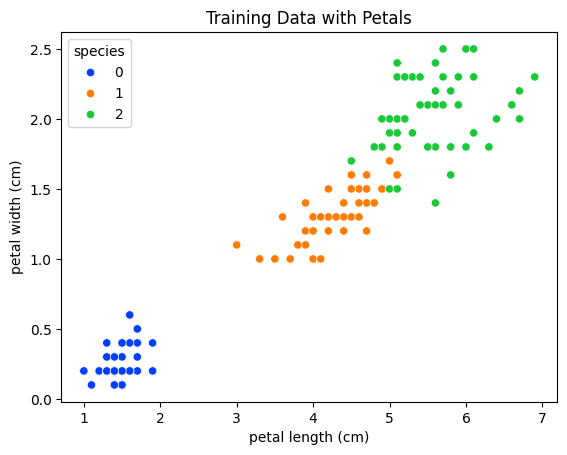

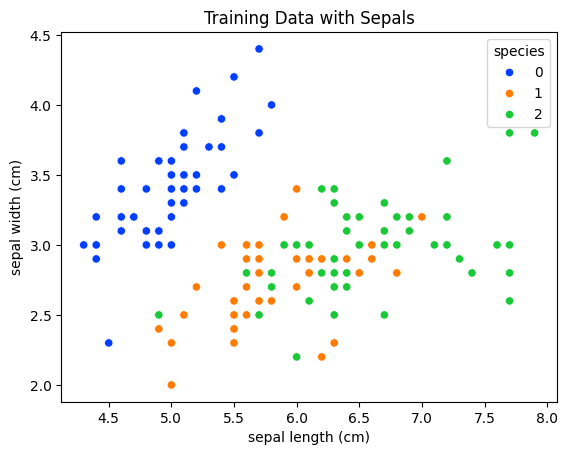

In [ ]:
petal = sns.scatterplot(data = df, x = "petal length (cm)", y = "petal width (cm)", hue = "species", palette = "bright")
petal.set_title("Training Data with Petals")
plt.show()

sepal = sns.scatterplot(data = df, x = "sepal length (cm)", y = "sepal width (cm)", hue = "species", palette = "bright")
sepal.set_title("Training Data with Sepals")
plt.show()

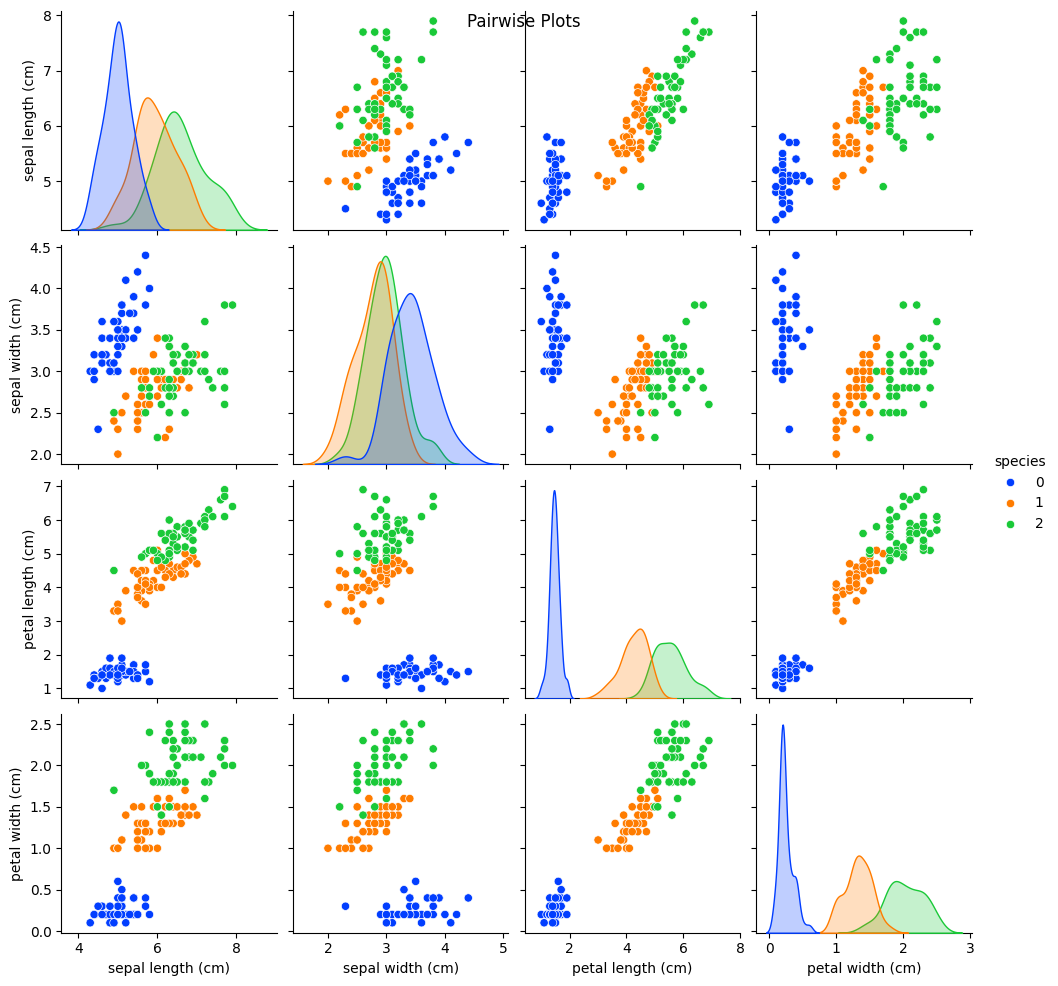

In [ ]:
pairwise = sns.pairplot(df, hue = "species", palette = "bright")
pairwise.fig.suptitle("Pairwise Plots")
plt.show()

In [ ]:
x_features = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]

X_train, X_test, y_train, y_test = train_test_split(df[x_features], df["species"], test_size = .2, random_state = 72)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

X_train shape:  (120, 4)
y_train shape:  (120,)


In [ ]:
log_m = LogisticRegression()
log_m.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#generate boundary equation
b = log_m.intercept_[0]
w1, w2, w3 = log_m.coef_.T[0]

c = -b/w3
m1 = -w1/w3
m2 = -w2/w3

print(f"Decision boundary equation: y = {m1:.4f}*x1 + {m2:.4f}*x2 + {c:.4f}")

Decision boundary equation: y = -2.2550*x1 + 3.2550*x2 + 54.0263


In [ ]:
pred = log_m.predict(X_test)
print(pred)

[0 1 2 2 2 1 1 2 0 0 0 0 1 0 0 1 2 0 0 0 1 2 0 1 1 2 0 2 2 0]


In [ ]:
print("Score: ", log_m.score(X_test, y_test))
print("MSE: ", mean_squared_error(y_test, pred))

Score:  1.0
MSE:  0.0


### Question 3: SVM

The data used in this model is the [YouTube comments dataset](https://www.kaggle.com/datasets/atifaliak/youtube-comments-dataset) available on Kaggle.com.

In [ ]:
url = 'https://raw.githubusercontent.com/brad-paton/Misc_Projects/refs/heads/main/YoutubeCommentsDataSet.csv'
yt_data = pd.read_csv(url)
yt_data.dropna(inplace = True)
yt_data.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


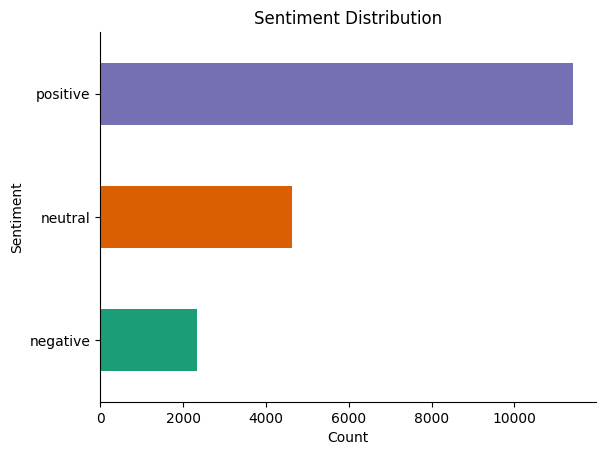

In [ ]:
yt_data.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Sentiment Distribution')
plt.xlabel('Count')
plt.ylabel('Sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Split into predictor and the resulting category
yt_X = yt_data['Comment']
yt_y = yt_data['Sentiment']

# Split the data into training and testing sets (80% train, 20% test)
yt_X_train, yt_X_test, yt_y_train, yt_y_test = train_test_split(yt_X, yt_y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
yt_X_train_vec = vectorizer.fit_transform(yt_X_train)
yt_X_test_vec = vectorizer.transform(yt_X_test)

In [ ]:
# Create SVM model
yt_model = SVC(kernel='linear')
yt_model.fit(yt_X_train_vec, yt_y_train)

SVC(kernel='linear')

In [ ]:
# Make predictions on the testing data
yt_y_pred = yt_model.predict(yt_X_test_vec)

# Evaluate the model
accuracy = accuracy_score(yt_y_test, yt_y_pred)
report = classification_report(yt_y_test, yt_y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.7574190035393411
              precision    recall  f1-score   support

    negative       0.54      0.39      0.45       441
     neutral       0.62      0.60      0.61       912
    positive       0.83      0.89      0.86      2320

    accuracy                           0.76      3673
   macro avg       0.67      0.63      0.64      3673
weighted avg       0.75      0.76      0.75      3673



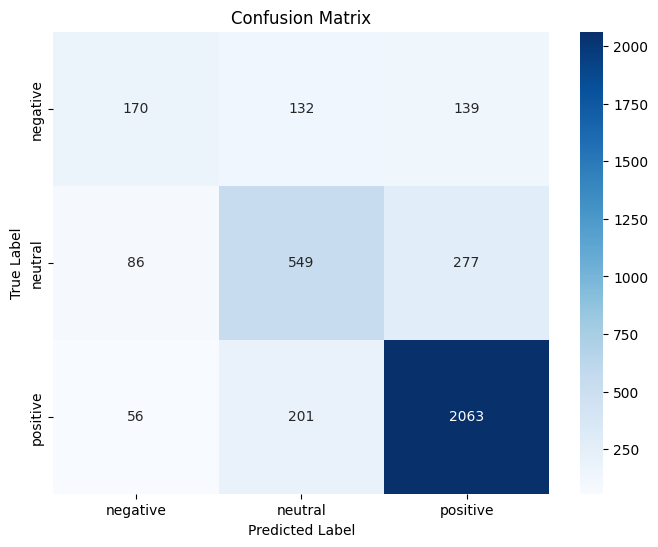

In [ ]:
# Create confusion matrix
cm = confusion_matrix(yt_y_test, yt_y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels = yt_model.classes_, yticklabels = yt_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The SVM model worked well with the high dimensionality of the YouTube comment data and we were able to build a model that returned 75% accuracy. The confusion matrix also backs up that the type 1 and 2 errors were not disproportionate to a specific error type either further backing up its effectiveness.
